<h3>About this Dataset</h3>

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "output" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

<b>Attribute Information:</b>
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values. One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

<b>Acknowledgements</b>
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

<i>Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-877</i>

In [1]:
## use this command to activate virtual environment in jupyter notebook 

# 1. make the virtual environment 
# 2. install ipykernel in the environment 
# 3. make the kernel of jupyter notebook for your virtual environment with the command:
#    >> python -m ipykernel install --user --name=your_virtual_environment_name

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
## loading the dataset 

df = pd.read_csv('../input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# renaming column names to be more interpretable 

updated_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'SerumCholestoral', 'FastingBloodSugar', 'RestingECG', 
               'MaxHeartRate', 'ExeriseEnducedAngina', 'OldPeak', 'SlopeOldPeak', 'MajorVessels', 'Thal', 'Output']
df.columns = updated_cols
df.head()

,Age,Sex,ChestPainType,RestingBP,SerumCholestoral,FastingBloodSugar,RestingECG,MaxHeartRate,ExeriseEnducedAngina,OldPeak,SlopeOldPeak,MajorVessels,Thal,Output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# since all the features are numerical, we can use df.describe() to understand the statistical measures

df.describe()

,Age,Sex,ChestPainType,RestingBP,SerumCholestoral,FastingBloodSugar,RestingECG,MaxHeartRate,ExeriseEnducedAngina,OldPeak,SlopeOldPeak,MajorVessels,Thal,Output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Min Age:  29
Mean Age:  54.366336633663366
Max Age:  77


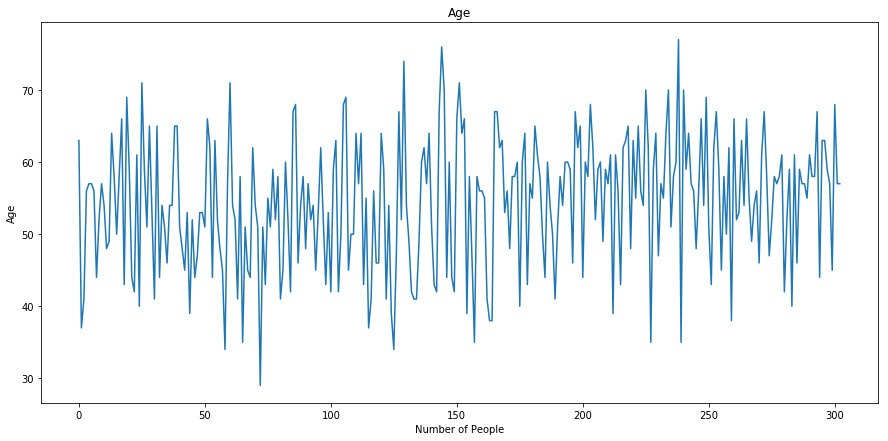

In [5]:
## plotting all the features to observe any interesting fact 

## 1. Age

plt.figure(figsize=(15,7))
plt.xlabel('Number of People')
plt.ylabel('Age')
plt.title('Age')
plt.plot(df.Age)
print("Min Age: ", df.Age.min())
print("Mean Age: ", df.Age.mean())
print("Max Age: ", df.Age.max())

Number of Males:  207
Number of Females:  96
Total People:  303


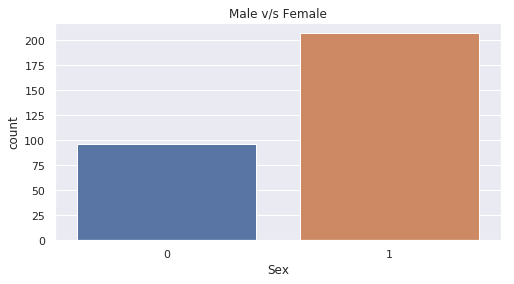

In [6]:
# 2. Sex

sns.set(style="darkgrid")
plt.figure(figsize=(8,4))
plt.title('Male v/s Female')
sns.countplot(x="Sex", data=df)
print("Number of Males: ", (df.Sex==1).sum())
print("Number of Females: ", (df.Sex==0).sum())
print("Total People: ", df.Sex.count())

Number of Chest Pain Type 0:  143
Number of Chest Pain Type 1:  50
Number of Chest Pain Type 2:  87
Number of Chest Pain Type 3:  23


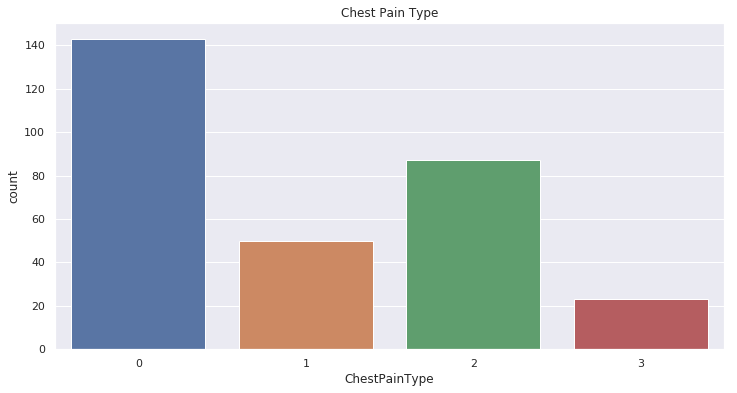

In [7]:
# 3. Chest Pain Type 

sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Chest Pain Type')
sns.countplot(x="ChestPainType", data=df)
print("Number of Chest Pain Type 0: ", (df.ChestPainType==0).sum())
print("Number of Chest Pain Type 1: ", (df.ChestPainType==1).sum())
print("Number of Chest Pain Type 2: ", (df.ChestPainType==2).sum())
print("Number of Chest Pain Type 3: ", (df.ChestPainType==3).sum())

Highest value:  200
Mean value:  131.62376237623764
Lowest value:  94


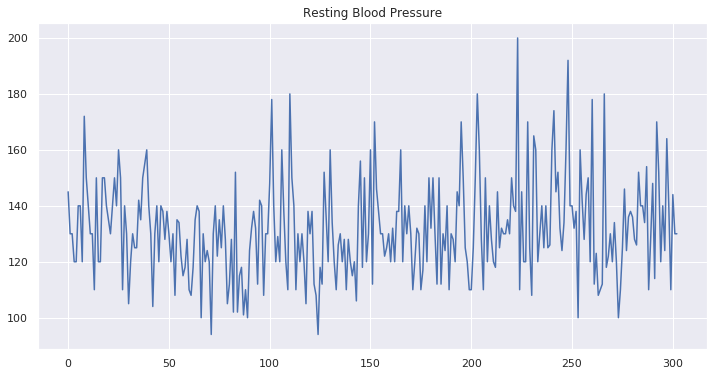

In [8]:
# 4. Blood Pressure 

sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
plt.title('Resting Blood Pressure')
plt.plot(df.RestingBP)
print("Highest value: ", df.RestingBP.max())
print("Mean value: ", df.RestingBP.mean())
print("Lowest value: ", df.RestingBP.min())

Highest value:  564
Mean value:  246.26402640264027
Lowest value:  126


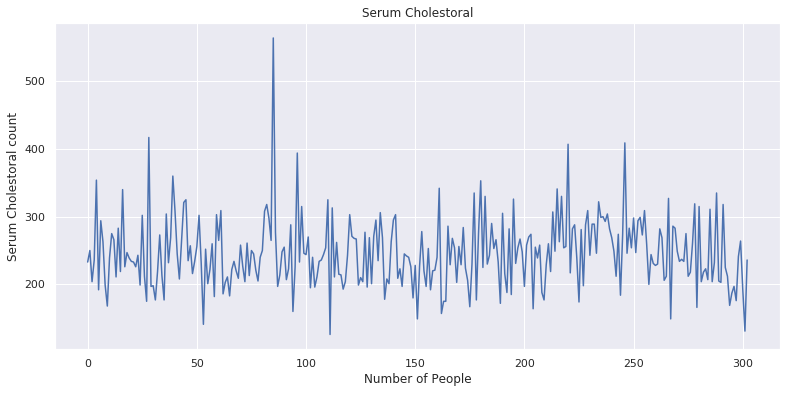

In [9]:
# 5. Serum Cholestrol

sns.set(style="darkgrid")
plt.figure(figsize=(13,6))
plt.title('Serum Cholestoral')
plt.xlabel("Number of People")
plt.ylabel("Serum Cholestoral count")
plt.plot(df["SerumCholestoral"])
print("Highest value: ", df.SerumCholestoral.max())
print("Mean value: ", df.SerumCholestoral.mean())
print("Lowest value: ", df.SerumCholestoral.min())

Fasting Blood Sugar > 120 mg/dl ?
Yes: 1
No: 0


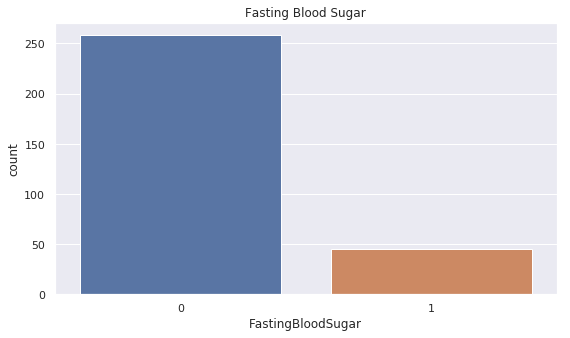

In [10]:
# 6. Fasting Blood Sugar

print("Fasting Blood Sugar > 120 mg/dl ?")
print("Yes: 1")
print("No: 0")
sns.set(style="darkgrid")
plt.figure(figsize=(9,5))
plt.title('Fasting Blood Sugar')
sns.countplot(x='FastingBloodSugar', data=df)
plt.show()

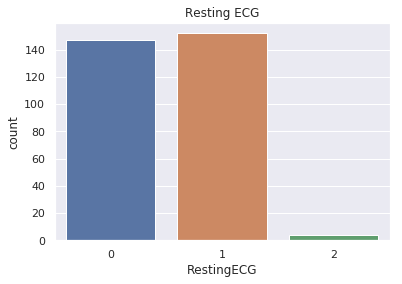

In [11]:
# 7. Resting ECG

sns.countplot(x='RestingECG', data=df)
plt.title("Resting ECG")
plt.show()

Highest value:  202
Mean value:  149.64686468646866
Lowest value:  71


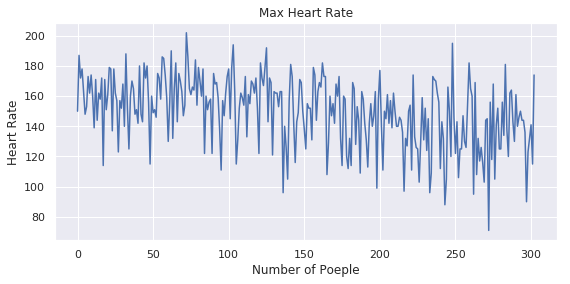

In [12]:
# 8. Max Heart Rate

plt.figure(figsize=(9,4))
plt.plot(df.MaxHeartRate)
print("Highest value: ", df.MaxHeartRate.max())
print("Mean value: ", df.MaxHeartRate.mean())
print("Lowest value: ", df.MaxHeartRate.min())
plt.xlabel("Number of Poeple")
plt.ylabel("Heart Rate")
plt.title("Max Heart Rate")
plt.show()

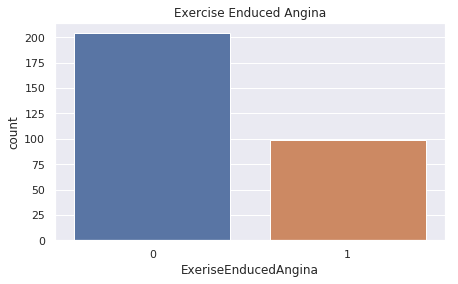

In [13]:
# 9. Exerise Enduced Angina

plt.figure(figsize=(7,4))
sns.countplot(x='ExeriseEnducedAngina', data=df)
plt.title("Exercise Enduced Angina")
plt.show()

Highest value:  6.2
Mean value:  1.0396039603960396
Lowest value:  0.0


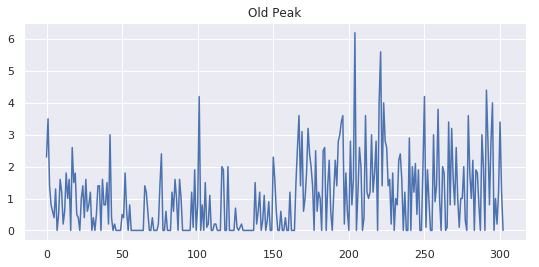

In [14]:
# 10. Old Peak

print("Highest value: ", df.OldPeak.max())
print("Mean value: ", df.OldPeak.mean())
print("Lowest value: ", df.OldPeak.min())
plt.figure(figsize=(9, 4))
plt.title("Old Peak")
plt.plot(df.OldPeak)
plt.show()

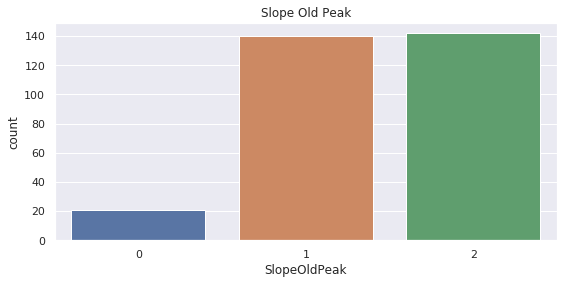

In [15]:
# 11. Slope Old Peak

plt.figure(figsize=(9, 4))
sns.countplot(x='SlopeOldPeak', data=df)
plt.title("Slope Old Peak")
plt.show()

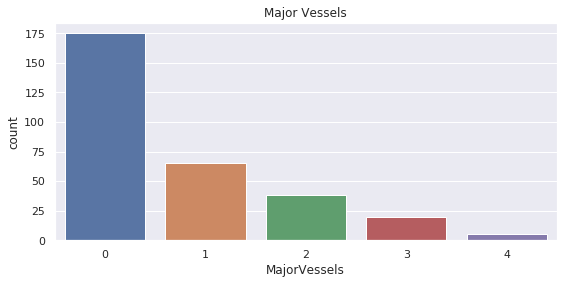

In [16]:
# 12. Major Vessels

plt.figure(figsize=(9, 4))
sns.countplot(data=df, x='MajorVessels')
plt.title("Major Vessels")
plt.show()

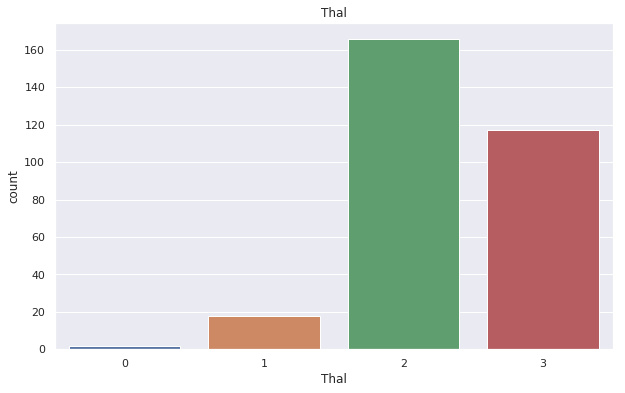

In [17]:
# 13. Thal

plt.figure(figsize=(10, 6))
sns.countplot(x='Thal', data=df)
plt.title("Thal")
plt.show()

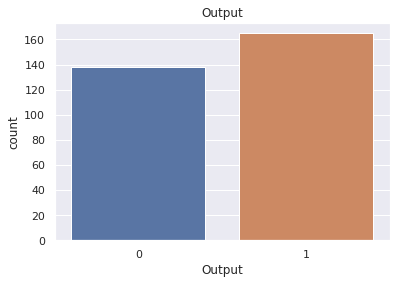

In [18]:
# 14. Output

sns.countplot(x='Output', data=df)
plt.title("Output")
plt.show()

In [19]:
# Preparing the features dataframe 

X = df.drop('Output', axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,SerumCholestoral,FastingBloodSugar,RestingECG,MaxHeartRate,ExeriseEnducedAngina,OldPeak,SlopeOldPeak,MajorVessels,Thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
# Preparing the depenedent variable / output

y = df.Output
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Output, dtype: int64

In [21]:
# Creating the training and test sets 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [26]:
# Using Random Forest Classifier to be the first model 

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rf = model.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Score using Random Forest without any hyperparameter tuning: ", rf_score)

Score using Random Forest without any hyperparameter tuning:  0.8032786885245902


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
# Using grid search for hyperparameter tuning for random forest to get the best paramaters and score 

from sklearn.model_selection import GridSearchCV

grid_param = {  
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
    'bootstrap': [True, False]
}

gd_sr = GridSearchCV(estimator=rf,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_ 
best_score = gd_sr.best_score_

print("Best paramaters for RandomForestClassifier: ", best_parameters)
print("Best score for RandomForestClassifier: ", best_score )

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best paramaters for RandomForestClassifier:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 80, 'n_estimators': 300}
Best score for RandomForestClassifier:  0.8553719008264463


In [24]:
# Using grid search for hyperparameter tuning for SVC to get the best paramaters and score 

from sklearn.svm import SVC

svc = SVC()

grid_param = {  
      'C':[1,10,100,1000],
      'gamma':[1,0.1,0.001,0.0001], 
      'kernel':['linear','rbf']
}

gd_sr = GridSearchCV(estimator=svc,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_  
best_score = gd_sr.best_score_

print("Best parameters for SVC: ", best_parameters)  
print("Best score for SVC: ", best_score)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters for SVC:  {'C': 1000, 'gamma': 1, 'kernel': 'linear'}
Best score for SVC:  0.8223140495867769


<h3> It can be clearly observed that using <font color='green'>Random Forest Classifier</font> with Grid Search gives us the best score of: <br> <br><font color='red'>0.85</font><br></h3>

<i>This notebook is under active development and anybody can fork and build a better version. </i>

<h3>Upcoming updates</h3>
<li>Trying other models</li>
<li>Better Data Analysis</li>
<li>Better Data Preprocessing</li>
<br>
<i>Please do share your opinions and reccomendations :)</i>